# ** Tensorflow Experiments **

We are going to learn what convolution is and we will apply it to images using tensorflow!
Everything in tensorflow takes place in a computational graph. We first define everything in the graph (no computing yet) and running and evaluating anything requires a session.

In [56]:
import tensorflow as tf

In [57]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [58]:
img = plt.imread('hand.jpeg')

In [59]:
print(img.shape)
print(type(img))

(174, 290, 3)
<class 'numpy.ndarray'>


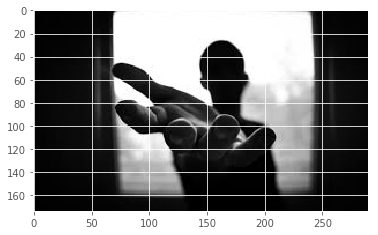

In [60]:
plt.imshow(img)
image = tf.cast(img, tf.float32)

In [61]:
flattened = img.ravel()
print(len(flattened))
print(flattened[:10])

151380
[1 1 1 1 1 1 1 1 1 1]


### Visualize
Now let's visualize how these flattened out pixel values look like.

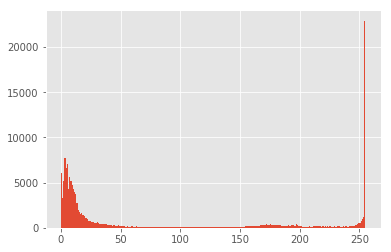

In [62]:
res = plt.hist(flattened.ravel(), 255)

In [63]:
# We can start a session in tf like this 
# sess = tf.Session()
# compute something like this 
# computed_x = sess.run(x)
# print(computed_x)
# and close it like this 
# sess.close()

# We can get the default graph by 
# g = tf.get_default_graph()
# and we can get all the operations put in the graph automatically by 
# [op.name for op in g.get_operations()]

# We will now setup an interactive session 
sess = tf.InteractiveSession()
x = tf.linspace(-3.0, 3.0, 90)
print(x.get_shape())

# We see that the shape is 1-dimensional as it's a list, hence you only get the length.

(90,)


### Let's make a kernel

We now make out first kernel, the gaussian kernel! 
The idea comes from a gaussian distribution which looks like this.


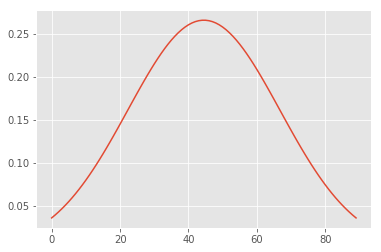

In [64]:
# The 1 dimensional gaussian takes two parameters, the mean value, and the standard deviation, which is commonly denoted by the name sigma.
mean = 0
sigma = 1.5

# Don't worry about trying to learn or remember this formula.  I always have to refer to textbooks or check online for the exact formula.
z = (tf.exp(tf.negative(tf.pow(x - mean, 2.0) /
                   (2.0 * tf.pow(sigma, 2.0)))) *
     (1.0 / (sigma * tf.sqrt(2.0 * 3.1415))))
res = z.eval()
plt.plot(res)

We now try to convert this one dimensional Gaussion curve in to a 2-D Gaussian kernel.
We do this by multiplying a matrix by its transpose.

In [65]:
kernel_size = z.get_shape().as_list()[0]
print(kernel_size)

90


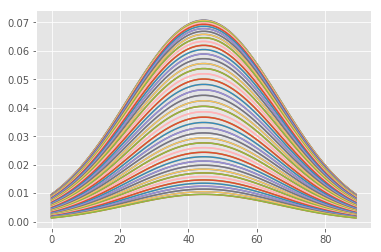

In [66]:
z_2d = tf.matmul(tf.reshape(z,[kernel_size,1]),tf.reshape(z,[1,kernel_size]))
res = plt.plot(z_2d.eval())

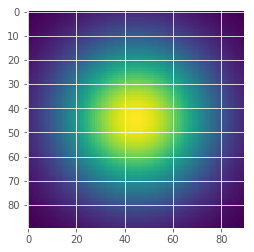

In [67]:
ans = plt.imshow(z_2d.eval())

## Convolution 
Now we're going to convolve our image with this gaussian filter which basically means we're going to look at the image through a lens of this filter. So this filter will look at chunks of the image and the by virtue of its nature it will give more weight(importance/value) to the center pixels of the chunk and decreasing importance/weight to the side pixels as visible in the graph. After this, it returns with one value which we will replace at that place.

In [68]:
img_4d = tf.reshape(image,[1,img.shape[0],img.shape[1],3])
print(img_4d)

Tensor("Reshape_71:0", shape=(1, 174, 290, 3), dtype=float32)


We'll also have to reshape our Gaussian Kernel to be 4-dimensional as well. The dimensions for kernels are slightly different!

Remember that the image is:

Number of Images x Image Height x Image Width x Number of Channels

we have:

**Kernel Height** x **Kernel Width** x **Number of Input Channels** x **Number of Output Channels**

In [69]:
print("Old shape: " ,z_2d.shape.as_list())
#z_2d.shape.as_list()[0],z_2d.shape.as_list()[1]
z_4d = tf.reshape(z_2d,[30,-1,3,3])
print("New shape: ", z_4d.shape.as_list())

Old shape:  [90, 90]
New shape:  [30, 30, 3, 3]


(1, 174, 290, 3)


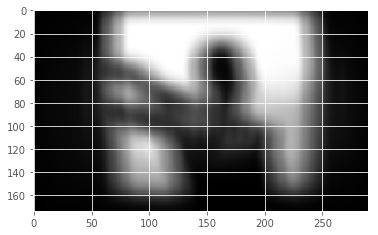

In [70]:
# Convolving our image
convolved = tf.nn.conv2d(img_4d, z_4d, strides=[1, 1, 1, 1], padding='SAME')
res = convolved.eval()
print(res.shape)
#plt.imshow(np.squeeze(res), cmap='gray')

# Or we could specify the exact dimensions we want to visualize:
plt.imshow(res[0, :, :, 0], cmap='gray')

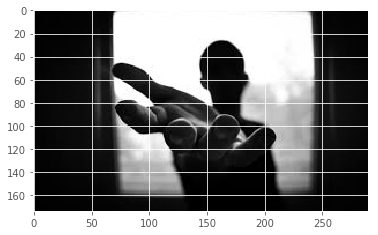

In [71]:
# OLD IMAGE RECAP : 
plt.imshow(img)

### Gabor Kernel
We will now try to Experiment and convolve with another type of kernel called the gabor kernel.
Gabor filter, named after Dennis Gabor, is a linear filter used for texture analysis, which means that it basically analyses whether there are any specific frequency content in the image in specific directions in a localized region around the point or region of analysis.

2D Gabor filter is a Gaussian kernel function modulated by a sinusoidal plane wave.

In [72]:
siz = 90
xs = tf.linspace(-3.0, 3.0, siz)

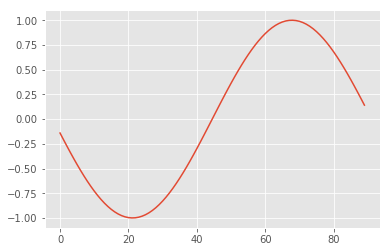

In [73]:
ys = tf.sin(xs)
plt.figure()
plt.plot(ys.eval())
ys = tf.reshape(ys, [siz, 1])
# print(ys.eval())

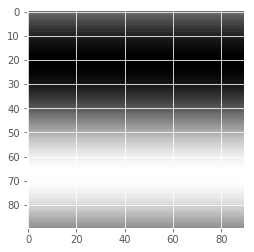

In [74]:
# We now want to convert this into a 2-D wave.
ones = tf.ones((1, siz))
wave = tf.matmul(ys, ones)
plt.imshow(wave.eval(), cmap='gray')

(90, 90)
(90, 90)


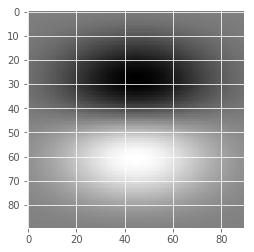

In [75]:
print(wave.shape)
print(z_2d.shape)
gabor = tf.multiply(wave, z_2d)
plt.imshow(gabor.eval(), cmap='gray')

In [76]:
gabor_4d = tf.reshape(gabor, tf.stack([30,30,3,3]))

# And finally, convolve the two:
convolved = tf.nn.conv2d(img_4d, gabor_4d, strides=[1, 1, 1, 1], padding='SAME', name='convolved')
convolved_img = convolved[0, :, :, 0]

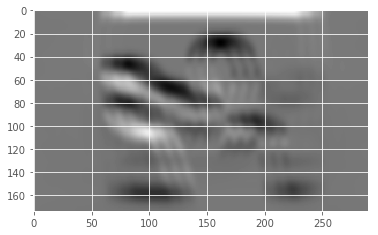

In [77]:
res = plt.imshow(convolved_img.eval(), cmap='gray')

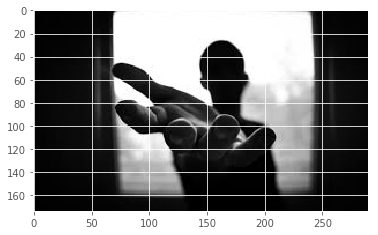

In [78]:
# OLD IMAGE RECAP
plt.imshow(img)

In [80]:
# Extra code to learn how to use tf placeholders
# img = tf.placeholder(tf.float32, shape=[None,None,None], name='img')

# # We'll reshape the 2d image to a 3-d tensor just like before:
# # Except now we'll make use of another tensorflow function, expand dims, which adds a singleton dimension at the axis we specify.
# # We use it to reshape our H x W image to include a channel dimension of 1
# # our new dimensions will end up being: H x W x 1
# # img_3d = tf.expand_dims(img, 2)
# # dims = img_3d.get_shape()
# # print(dims)

# # And again to get: 1 x H x W x 1
# img_4d = tf.expand_dims(img, 0)
# print(img_4d.get_shape().as_list())

# # Let's create another set of placeholders for our Gabor's parameters:
# mean = tf.placeholder(tf.float32, name='mean')
# sigma = tf.placeholder(tf.float32, name='sigma')
# ksize = tf.placeholder(tf.int32, name='ksize')
# x = tf.linspace(-3.0, 3.0, ksize)
# z = (tf.exp(tf.negative(tf.pow(x - mean, 2.0) /
#                    (2.0 * tf.pow(sigma, 2.0)))) *
#       (1.0 / (sigma * tf.sqrt(2.0 * 3.1415))))
# z_2d = tf.matmul(
#   tf.reshape(z, tf.stack([ksize, 1])),
#   tf.reshape(z, tf.stack([1, ksize])))
# ys = tf.sin(x)
# ys = tf.reshape(ys, tf.stack([ksize, 1]))
# ones = tf.ones(tf.stack([1, ksize]))
# wave = tf.matmul(ys, ones)
# gabor = tf.multiply(wave, z_2d)
# gabor_4d = tf.reshape(gabor, tf.stack([ksize, ksize, 3, 3]))

# # And finally, convolve the two:
# convolved = tf.nn.conv2d(img_4d, gabor_4d, strides=[1, 1, 1, 1], padding='SAME', name='convolved')
# convolved_img = convolved[0, :, :, 0]